#K-Means Clustering

# Import Library

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

#Read data

In [ ]:
#import data
df = pd.read_csv('/content/users.csv')

In [ ]:
df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,19279,Heidi,Jackson,heidijackson@example.org,50,F,Mie,894 Nicholas Curve Suite 865,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2020-11-07 12:40:00+00:00
1,5678,Michael,Brooks,michaelbrooks@example.org,58,M,Acre,0549 Deanna Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-07-28 04:20:00+00:00
2,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Facebook,2019-08-16 17:06:00+00:00
3,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-09 12:08:00+00:00
4,47096,Holly,Kennedy,hollykennedy@example.org,68,F,Acre,23658 Santana Mission,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-24 15:53:00+00:00


In [ ]:
#drop data
data = df.drop(['first_name', 'last_name', 'email', 'state',
                  'street_address', 'postal_code','latitude',
                'longitude','city'], axis=1)
data

,id,age,gender,country,traffic_source,created_at
0,19279,50,F,Japan,Search,2020-11-07 12:40:00+00:00
1,5678,58,M,Brasil,Email,2019-07-28 04:20:00+00:00
2,29694,60,M,Brasil,Facebook,2019-08-16 17:06:00+00:00
3,29967,12,M,Brasil,Search,2019-05-09 12:08:00+00:00
4,47096,68,F,Brasil,Search,2019-05-24 15:53:00+00:00
...,...,...,...,...,...,...
99995,91847,67,F,South Korea,Facebook,2021-03-28 13:47:00+00:00
99996,12802,35,F,South Korea,Email,2020-01-17 09:21:00+00:00
99997,28309,59,M,South Korea,Email,2021-12-16 03:27:00+00:00
99998,35063,23,F,South Korea,Search,2019-03-07 05:46:00+00:00


# EDA (Explorartory Data Analysis)
untuk mendapatkan informasi pada data

## Melihat jumlah baris dan kolom

In [ ]:
data.shape

(100000, 6)

## Menampilkan nama kolom

In [ ]:
data.columns 

Index(['id', 'age', 'gender', 'country', 'traffic_source', 'created_at'], dtype='object')

## Menampilkan info dari tiap variable

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              100000 non-null  int64 
 1   age             100000 non-null  int64 
 2   gender          100000 non-null  object
 3   country         100000 non-null  object
 4   traffic_source  100000 non-null  object
 5   created_at      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


## Melihat missing value

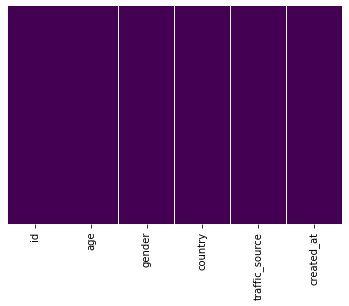

In [ ]:
# Plot data kosong
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

tidak ada missing value

In [ ]:
# mengubah data non numerik menjadi numerik dan membulatkan nilai float (desimal)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['traffic_source'] = le.fit_transform(data['traffic_source'])
data['country'] = le.fit_transform(data['country'])
data['created_at'] = le.fit_transform(data['created_at'])

In [ ]:
# Cek jenis data yang telah di encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id              100000 non-null  int64
 1   age             100000 non-null  int64
 2   gender          100000 non-null  int64
 3   country         100000 non-null  int64
 4   traffic_source  100000 non-null  int64
 5   created_at      100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [ ]:
# melihat statistik data
data.describe()

,id,age,gender,country,traffic_source,created_at
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,41.057690,0.499470,7.50980,3.423810,48341.975730
std,28867.657797,17.000799,0.500002,4.58862,1.066296,27913.873758
min,1.000000,12.000000,0.000000,0.00000,0.000000,0.000000
25%,25000.750000,26.000000,0.000000,4.00000,3.000000,24158.750000
50%,50000.500000,41.000000,0.000000,4.00000,4.000000,48328.000000
75%,75000.250000,56.000000,1.000000,13.00000,4.000000,72523.250000
max,100000.000000,70.000000,1.000000,14.00000,4.000000,96767.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

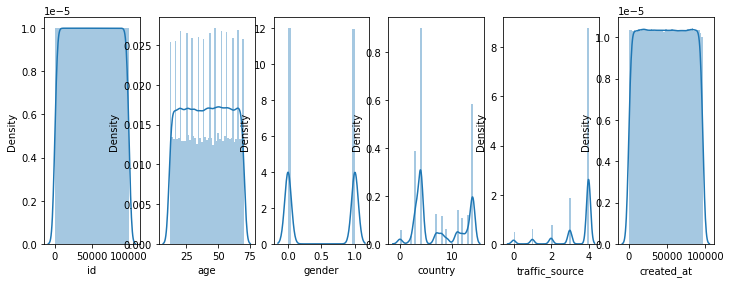

In [ ]:
# Melihat distribusi data
l = data.columns.values
number_of_columns=len(data.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data[l[i]],kde=True) 

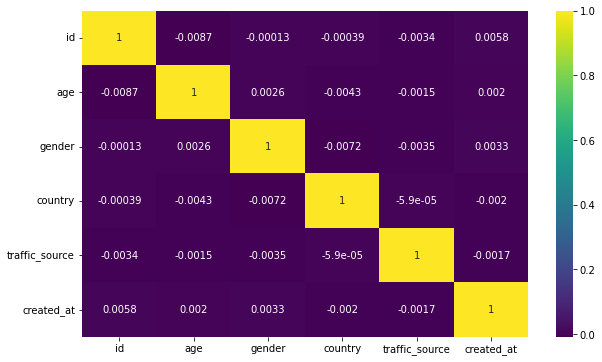

In [ ]:
# Melihat korelasi data
k = len(data.columns)
cm = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#Normalisasi data menggunakan MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_new = data.drop('id', axis = 1)
scaler = MinMaxScaler()

data_new = scaler.fit_transform(data_new)

In [ ]:
# Data yang telah dinormalsasi
data_new

array([[0.65517241, 0.        , 0.64285714, 1.        , 0.52685316],
       [0.79310345, 1.        , 0.21428571, 0.25      , 0.16135666],
       [0.82758621, 1.        , 0.21428571, 0.5       , 0.17690948],
       ...,
       [0.81034483, 1.        , 0.78571429, 0.25      , 0.84333502],
       [0.18965517, 0.        , 0.78571429, 1.        , 0.04917999],
       [0.36206897, 0.        , 0.78571429, 0.75      , 0.21101202]])

Text(0, 0.5, 'y')

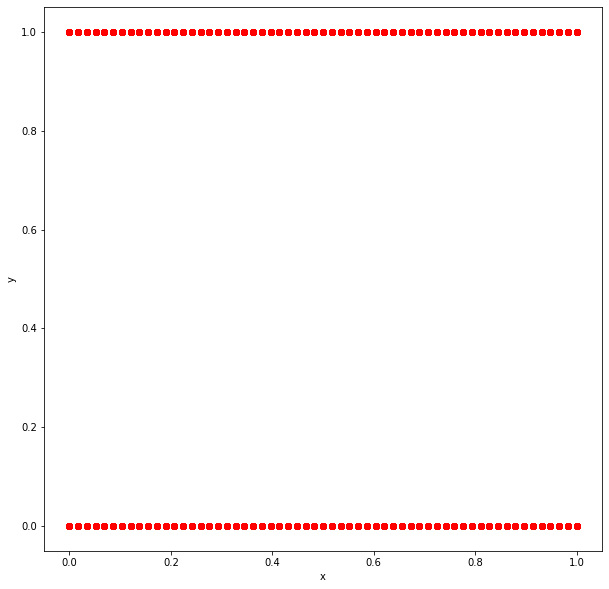

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(10,10))
plt.scatter(data_new[:,0],data_new[:,1], color='red')
plt.xlabel('x')
plt.ylabel('y')

# K-Means
membentuk model clustering K-Means

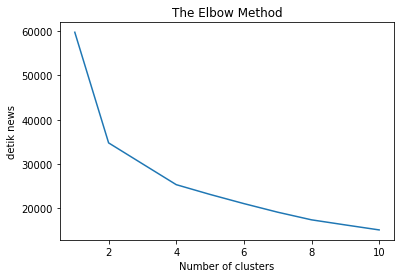

In [ ]:
#Mencari jumlah klaster terbaik untuk metode k-means
from sklearn.cluster import KMeans
detiknews = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data_new)
    detiknews.append(kmeans.inertia_)
plt.plot(range(1,11),detiknews)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('detik news')
#plt.savefig('elbow.png')
plt.show()

## Menentukan nilai elbow yang ideal

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
ci = KneeLocator(range(1,11), detiknews, curve = "convex", direction = "decreasing")

In [ ]:
ci.elbow

2

Hasil metode elbow menyatakan bahwa jumlah klaster terbaik adalah 2 dan akan di buktikan menggunkan silhouette score

##Evaluasi dengan silhouette score

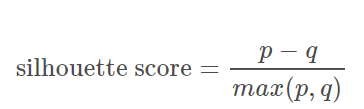


p adalah rata-rata jarak ke titik klaster terdekat yang bukan bagiannya

q adalah jarak intra-klaster rata-rata ke semua titik dalam clusternya sendiri.

nilai dari silhouette score dalam range -1 sampai 1.

semakin besar silhouette score semakin baik performa model

In [ ]:
# Melihat performa model menggunakan Silhouette dengan percobaan beberapa klaster
range_jum_klaster = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sil_score = []
for i in range_jum_klaster:
    
    # menerapkan model
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(data_new)
    
    klaster = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_new, klaster)
    sil_score.append(silhouette_avg)
    print("untuk jumlah klaster={0}, diperoleh silhouette score  {1}".format(i, silhouette_avg))

untuk jumlah klaster=2, diperoleh silhouette score  0.39610102028473726
untuk jumlah klaster=3, diperoleh silhouette score  0.3233225856706139
untuk jumlah klaster=4, diperoleh silhouette score  0.28790081798232325
untuk jumlah klaster=5, diperoleh silhouette score  0.2957540942388323
untuk jumlah klaster=6, diperoleh silhouette score  0.2763466352855633
untuk jumlah klaster=7, diperoleh silhouette score  0.2861823978038322
untuk jumlah klaster=8, diperoleh silhouette score  0.2706722303321458
untuk jumlah klaster=9, diperoleh silhouette score  0.27138729436870007
untuk jumlah klaster=10, diperoleh silhouette score  0.26675323388836014


dapat dilihat bahwa klaster=2 memiliki skor yang tertinggi dari klaster lainya, ini berati nilai k=2 adalah nilai yang ideal

## Plot Hasil Silhouette

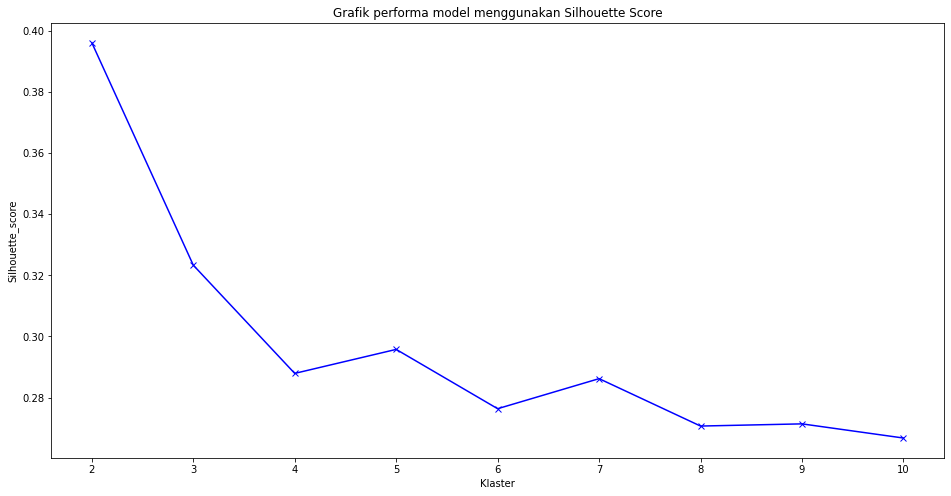

In [ ]:
# plot performa model
plt.figure(figsize=(16,8))
plt.plot(range_jum_klaster, sil_score, 'bx-')
plt.xlabel('Klaster')
plt.ylabel('Silhouette_score')
plt.title('Grafik performa model menggunakan Silhouette Score')
plt.show()

## Penerapan model K-means cluste

In [ ]:
# Menerapkan model K-Means menggunakan jumlah klaster 4
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(data_new)

KMeans(max_iter=50, n_clusters=2)

In [ ]:
# Label klaster
kmeans.labels_

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
# Memasukkan kolom klaster pada dataframe
data['Klaster'] = kmeans.labels_
data.head()

,id,age,gender,country,traffic_source,created_at,Klaster
0,19279,50,0,9,4,50982,0
1,5678,58,1,3,1,15614,1
2,29694,60,1,3,2,17119,1
3,29967,12,1,3,4,9534,1
4,47096,68,0,3,4,10726,0


In [ ]:
# Melihat jumlah data pada tiap klaster
data.Klaster.value_counts()

0    50053
1    49947
Name: Klaster, dtype: int64

# DataFrame Custer 

In [ ]:
#klaster pertama
c0 = data.loc[data['Klaster'] ==0]
c0

,id,age,gender,country,traffic_source,created_at,Klaster
0,19279,50,0,9,4,50982,0
4,47096,68,0,3,4,10726,0
5,48667,63,0,3,4,2308,0
10,54698,34,0,3,3,29151,0
12,84003,22,0,3,2,1545,0
...,...,...,...,...,...,...,...
99994,34338,70,0,11,4,24360,0
99995,91847,67,0,11,2,61773,0
99996,12802,35,0,11,1,28836,0
99998,35063,23,0,11,4,4759,0


In [ ]:
#klaster kedua
c1 = data.loc[data['Klaster'] ==1]
c1

,id,age,gender,country,traffic_source,created_at,Klaster
1,5678,58,1,3,1,15614,1
2,29694,60,1,3,2,17119,1
3,29967,12,1,3,4,9534,1
6,62650,38,1,3,4,27369,1
7,86352,45,1,3,4,7625,1
...,...,...,...,...,...,...,...
99986,33926,56,1,11,2,39148,1
99987,45798,31,1,11,4,16714,1
99990,49541,69,1,11,2,73724,1
99993,97594,50,1,11,4,72241,1


## Persentase setiap Klaster

In [ ]:
# Mencari jumlah total seluruh cluster
total = len(c0)+len(c1)

# Mencari persentase setiap cluster
p0 = (len(c0)/total)*100
print(p0)
p1 = (len(c1)/total)*100
print(p1)

50.053000000000004
49.947


Klaster pertama sebesar 50,05%, klaster kedua 49,97%







## Download data setelah di klaster

In [ ]:
#download klaster pertama
c0.to_csv('KlasterPertama.csv')
#download klaster pertama
c1.to_csv('KlasterKedua.csv')

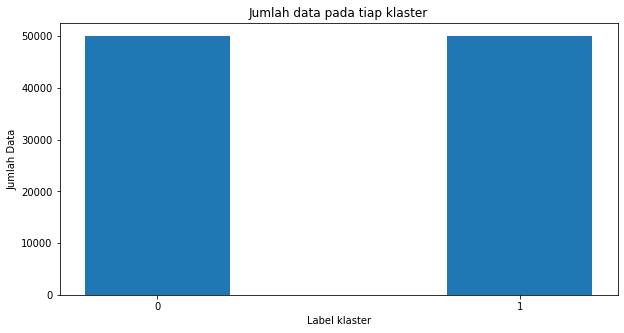

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['0', '1'], data.Klaster.value_counts(), width = 0.4)
plt.xlabel("Label klaster")
plt.ylabel("Jumlah Data")
plt.title("Jumlah data pada tiap klaster")
plt.show()